In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(0)

In [3]:
(X_train,y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
assert(X_train.shape[0] == y_train.shape[0]) ,"The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]) ,"The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (28,28)), "The dimension of the image are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimension of the image are not 28x28"

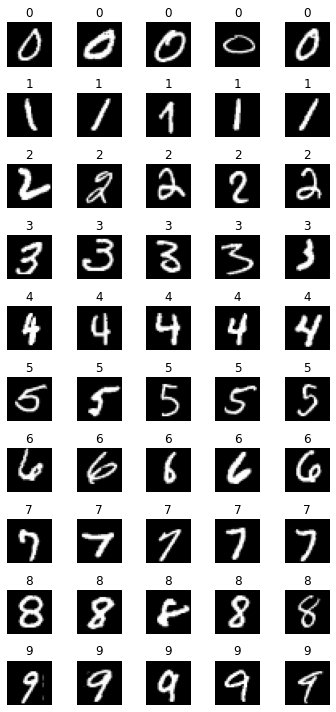

In [6]:
num_of_samples = []

cols = 5
num_classes = 10

fig , axes = plt.subplots(num_classes, cols, figsize= (5,10))

for i in range(cols):

    for j in range(num_classes):

        x_selected = X_train[y_train == j]
        random = np.random.randint(0,len(x_selected - 1))
        axes[j][i].imshow(x_selected[random, : , :],cmap = plt.get_cmap("gray"))
        axes[j][i].set_title(y_train[y_train == j][random])
        axes[j][i].axis("off")
        if i == 2:

            num_of_samples.append(len(x_selected))

plt.tight_layout()
plt.show()

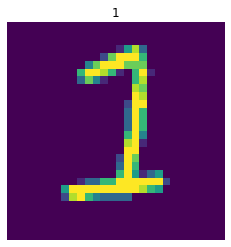

In [7]:
j = 1
x_selected = X_train[y_train == j]
random = np.random.randint(0,len(x_selected)-1)
plt.imshow(x_selected[random,:,:])
plt.title(y_train[y_train == j][random])
plt.axis("off")
plt.show()

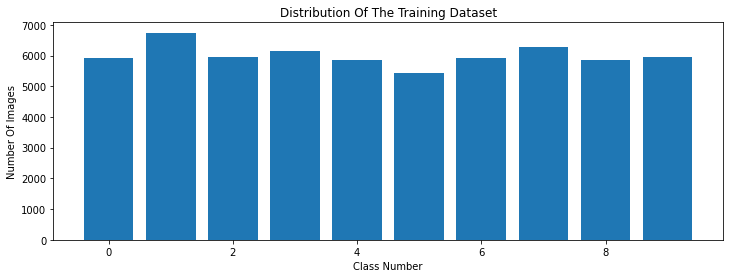

In [8]:
#print(num_of_samples)
plt.figure(figsize = (12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution Of The Training Dataset")
plt.xlabel("Class Number")
plt.ylabel("Number Of Images")
plt.show()

In [9]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train = X_train.reshape( (len(X_train), X_train.shape[1]*X_train.shape[2]) )
X_test = X_test.reshape( (len(X_test), X_test.shape[1]*X_test.shape[2]) )

X_train.shape ,X_test.shape

((60000, 784), (10000, 784))

In [12]:
def create_model():

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units = 10, input_dim = 784, activation = "relu"))
    model.add(tf.keras.layers.Dense(units = 10,  activation = "relu"))
    model.add(tf.keras.layers.Dense(units = num_classes, activation = "softmax"))
    model.compile(tf.keras.optimizers.Adam(learning_rate = 0.01), loss = "categorical_crossentropy", metrics = ["accuracy"])

    return model

In [13]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
h = model.fit(X_train , y_train , validation_split = 0.1,epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/10
270/270 [==============================] - 4s 9ms/step - loss: 0.5114 - accuracy: 0.8419 - val_loss: 0.2620 - val_accuracy: 0.9215
Epoch 2/10
270/270 [==============================] - 2s 6ms/step - loss: 0.3003 - accuracy: 0.9133 - val_loss: 0.2520 - val_accuracy: 0.9302
Epoch 3/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2759 - accuracy: 0.9207 - val_loss: 0.2602 - val_accuracy: 0.9268
Epoch 4/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2601 - accuracy: 0.9252 - val_loss: 0.2222 - val_accuracy: 0.9385
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2531 - accuracy: 0.9259 - val_loss: 0.2189 - val_accuracy: 0.9375
Epoch 6/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2409 - accuracy: 0.9291 - val_loss: 0.2085 - val_accuracy: 0.9410
Epoch 7/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2322 - accuracy: 0.9327 - val_loss: 0.2023 - val_accuracy: 0.9453
Epoch 

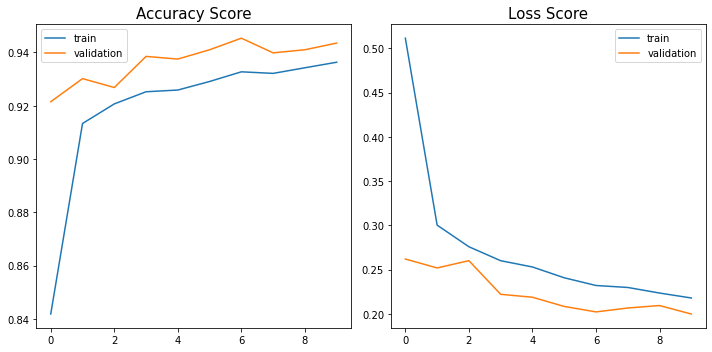

In [15]:
plt.figure(figsize= (10,5))

plt.subplot(121)
plt.plot(h.history["accuracy"], label = "train")
plt.plot(h.history["val_accuracy"], label = "validation")
plt.legend(loc = "best")
plt.title("Accuracy Score", fontsize = 15)

plt.subplot(122)
plt.plot(h.history["loss"], label = "train")
plt.plot(h.history["val_loss"], label = "validation")
plt.legend(loc = "best")
plt.title("Loss Score", fontsize = 15)

plt.tight_layout()
plt.show()

In [16]:
score = model.evaluate(X_test, y_test, verbose = 0)

print("Loss : ", score[0])
print("Accuracy : ", score[1])

Loss :  0.24177668988704681
Accuracy :  0.9322999715805054


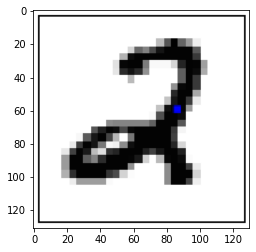

In [17]:
import requests
from PIL import Image

url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream = True)
#print(response)

img = Image.open(response.raw)
plt.imshow(img)
plt.show()

In [18]:
import cv2
img_array = np.asarray(img)
print(img_array.shape)

(131, 130, 3)


(28, 28, 3)
(28, 28)


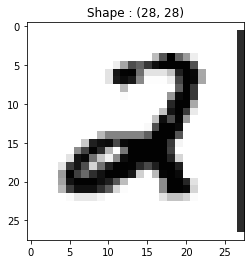

In [19]:
resized = cv2.resize(img_array, (28,28))
print(resized.shape)
gray = cv2.cvtColor(resized , cv2.COLOR_BGR2GRAY)
print(gray.shape)

plt.imshow(gray , cmap = "gray")
plt.title(f"Shape : {gray.shape}")
plt.show()

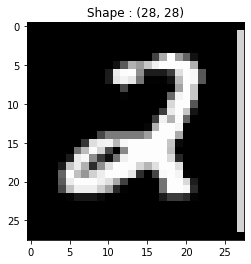

In [20]:
# Ama Arka taraf siyah olmalı

image = cv2.bitwise_not(gray)

plt.imshow(image , cmap = "gray")
plt.title(f"Shape : {image.shape}")
plt.show()

In [21]:
image = image / 255
image.max(),image.min()

(0.996078431372549, 0.0)

In [22]:
pred = model.predict(image.reshape(1, 28*28))
pred = np.argmax(pred)

print("Prediction is ", pred)

Prediction is  2


---

In [87]:
(X_train,y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [72]:
def leNet_Model():

    model = tf.keras.models.Sequential()

    # 25 * 30 + 30 = 750 + 30 = 780
    model.add(tf.keras.layers.Conv2D(filters = 30 , kernel_size = (5,5), input_shape = (28,28,1), strides = (1,1), padding = "valid" , activation = "relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (3,3)))

    return model

In [73]:
deneme = leNet_Model()
deneme.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 30)         0         
 g2D)                                                            
                                                                 
Total params: 780
Trainable params: 780
Non-trainable params: 0
_________________________________________________________________


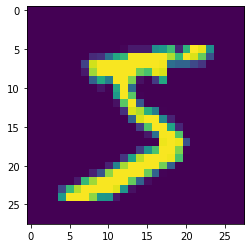

In [74]:
plt.imshow(X_train[0])
plt.show()

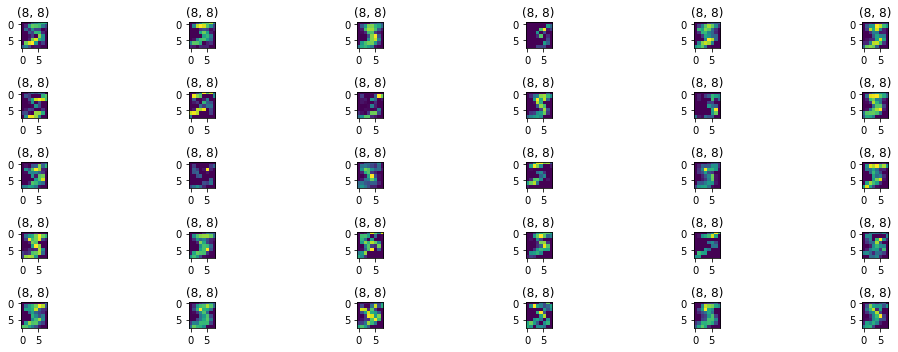

In [75]:
fig, axes = plt.subplots(5,6,figsize = (15,5))
axes = axes.ravel()

for i in range(len(axes)):
    axes[i].imshow(deneme.predict(X_train[0].reshape((1,28,28,1)))[0,:,:,i])
    axes[i].set_title(deneme.predict(X_train[0].reshape((1,28,28,1)))[0,:,:,i].shape)

plt.tight_layout()
plt.show()

In [84]:
def leNet_Model():

    model = tf.keras.models.Sequential()

    # 25 * 30 + 30 = 750 + 30 = 780
    model.add(tf.keras.layers.Conv2D(filters = 30 , kernel_size = (5,5), input_shape = (28,28,1) , activation = "relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

    # 15 * 30 * 3* 3 + 15 = 4065
    model.add(tf.keras.layers.Conv2D(filters = 15 , kernel_size = (3,3) , activation = "relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (3,3)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(500, activation = "relu"))
    model.add(tf.keras.layers.Dense(num_classes,activation = "softmax"))

    model.compile(optimizer = tf.keras.optimizers.Adam(0.01), loss = "categorical_crossentropy", metrics = ["accuracy"])

    return model

In [85]:
model = leNet_Model()
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 12, 12, 30)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 3, 3, 15)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 135)               0         
                                                                 
 dense_15 (Dense)            (None, 500)             

In [88]:
X_train = X_train.reshape((len(X_train), 28,28,1))
X_test = X_test.reshape((len(X_test), 28,28,1))
X_test.shape,X_train.shape

((10000, 28, 28, 1), (60000, 28, 28, 1))

In [89]:
X_train = X_train / 255
X_test = X_test / 255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

X_train.max(),X_train.min(),X_test.max(),X_test.min()

(1.0, 0.0, 1.0, 0.0)

In [90]:
h = model.fit(X_train, y_train, epochs = 10 , validation_split = 0.1, verbose = 1,batch_size = 400, shuffle = 1)

Epoch 1/10
135/135 [==============================] - 35s 255ms/step - loss: 0.2463 - accuracy: 0.9218 - val_loss: 0.0609 - val_accuracy: 0.9813
Epoch 2/10
135/135 [==============================] - 44s 325ms/step - loss: 0.0609 - accuracy: 0.9804 - val_loss: 0.0427 - val_accuracy: 0.9873
Epoch 3/10
135/135 [==============================] - 38s 282ms/step - loss: 0.0406 - accuracy: 0.9872 - val_loss: 0.0457 - val_accuracy: 0.9873
Epoch 4/10
135/135 [==============================] - 48s 353ms/step - loss: 0.0357 - accuracy: 0.9886 - val_loss: 0.0402 - val_accuracy: 0.9892
Epoch 5/10
135/135 [==============================] - 45s 331ms/step - loss: 0.0296 - accuracy: 0.9906 - val_loss: 0.0360 - val_accuracy: 0.9913
Epoch 6/10
135/135 [==============================] - 47s 344ms/step - loss: 0.0256 - accuracy: 0.9917 - val_loss: 0.0419 - val_accuracy: 0.9892
Epoch 7/10
135/135 [==============================] - 52s 382ms/step - loss: 0.0262 - accuracy: 0.9912 - val_loss: 0.0413 - val_ac

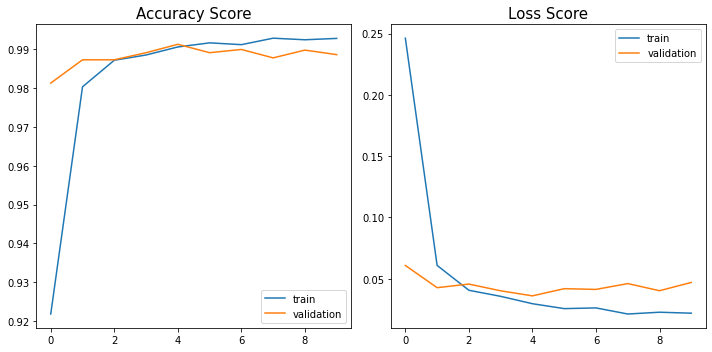

In [91]:
plt.figure(figsize= (10,5))

plt.subplot(121)
plt.plot(h.history["accuracy"], label = "train")
plt.plot(h.history["val_accuracy"], label = "validation")
plt.legend(loc = "best")
plt.title("Accuracy Score", fontsize = 15)

plt.subplot(122)
plt.plot(h.history["loss"], label = "train")
plt.plot(h.history["val_loss"], label = "validation")
plt.legend(loc = "best")
plt.title("Loss Score", fontsize = 15)

plt.tight_layout()
plt.show()

In [103]:
score = model.evaluate(X_test, y_test, verbose = 0)

print("Loss ", score[0] )
print("Accuracy ", score[1])

Loss  0.048406947404146194
Accuracy  0.9871000051498413


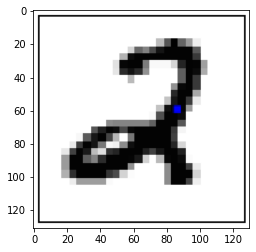

In [100]:
import requests
from PIL import Image

url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img, cmap = plt.get_cmap("gray"))
plt.show()

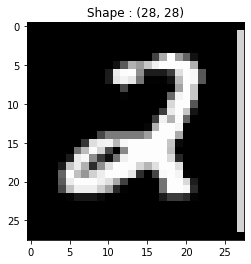

In [101]:
import cv2

img = np.array(img)
img = cv2.resize(img, (28,28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)

plt.imshow(img, cmap = "gray")
plt.title(f"Shape : {img.shape}")
plt.show()

In [102]:
img = img / 255
img = img.reshape((1,28,28,1))

pred = model.predict(img)
pred = np.argmax(pred)

print("Prediction is ", pred)

Prediction is  2


---

In [114]:
def leNet_Model():

    model = tf.keras.models.Sequential()

    # 25 * 30 + 30 = 750 + 30 = 780
    model.add(tf.keras.layers.Conv2D(filters = 30 , kernel_size = (5,5), input_shape = (28,28,1) , activation = "relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

    # 15 * 30 * 3* 3 + 15 = 4065
    model.add(tf.keras.layers.Conv2D(filters = 15 , kernel_size = (3,3) , activation = "relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (3,3)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(500, activation = "relu"))
    model.add(tf.keras.layers.Dropout(rate = 0.5 ))
    model.add(tf.keras.layers.Dense(num_classes,activation = "softmax"))

    model.compile(optimizer = tf.keras.optimizers.Adam(0.01), loss = "categorical_crossentropy", metrics = ["accuracy"])

    return model

In [ ]:
model = leNet_Model()

In [116]:
h = model.fit(X_train, y_train, epochs = 10 , validation_split = 0.1, verbose = 1,batch_size = 400, shuffle = 1)

Epoch 1/10
135/135 [==============================] - 38s 273ms/step - loss: 0.2752 - accuracy: 0.9112 - val_loss: 0.0679 - val_accuracy: 0.9793
Epoch 2/10
135/135 [==============================] - 34s 250ms/step - loss: 0.0809 - accuracy: 0.9742 - val_loss: 0.0445 - val_accuracy: 0.9852
Epoch 3/10
135/135 [==============================] - 35s 260ms/step - loss: 0.0695 - accuracy: 0.9785 - val_loss: 0.0414 - val_accuracy: 0.9877
Epoch 4/10
135/135 [==============================] - 34s 249ms/step - loss: 0.0605 - accuracy: 0.9811 - val_loss: 0.0443 - val_accuracy: 0.9868
Epoch 5/10
135/135 [==============================] - 33s 241ms/step - loss: 0.0531 - accuracy: 0.9838 - val_loss: 0.0388 - val_accuracy: 0.9883
Epoch 6/10
135/135 [==============================] - 34s 252ms/step - loss: 0.0495 - accuracy: 0.9851 - val_loss: 0.0431 - val_accuracy: 0.9892
Epoch 7/10
135/135 [==============================] - 34s 254ms/step - loss: 0.0540 - accuracy: 0.9837 - val_loss: 0.0437 - val_ac

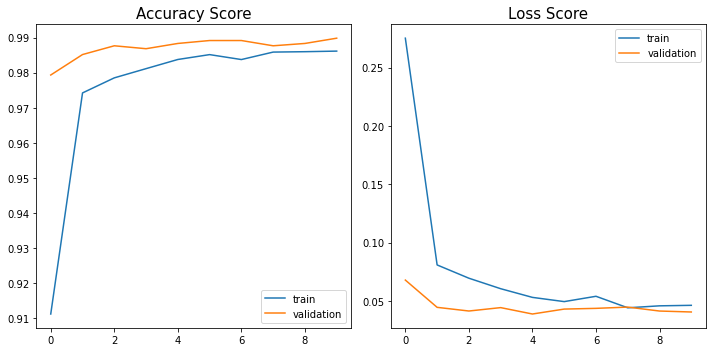

In [117]:
plt.figure(figsize= (10,5))

plt.subplot(121)
plt.plot(h.history["accuracy"], label = "train")
plt.plot(h.history["val_accuracy"], label = "validation")
plt.legend(loc = "best")
plt.title("Accuracy Score", fontsize = 15)

plt.subplot(122)
plt.plot(h.history["loss"], label = "train")
plt.plot(h.history["val_loss"], label = "validation")
plt.legend(loc = "best")
plt.title("Loss Score", fontsize = 15)

plt.tight_layout()
plt.show()

In [118]:
score = model.evaluate(X_test, y_test, verbose = 0)

print("Loss ", score[0] )
print("Accuracy ", score[1])

Loss  0.037214092910289764
Accuracy  0.9891999959945679


In [119]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 12, 12, 30)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 3, 3, 15)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 135)               0         
                                                                 
 dense_19 (Dense)            (None, 500)             

In [137]:
#layer1 = tf.keras.models.Model(inputs = model.layers[0].input, outputs = model.layers[0].output )
#layer2 = tf.keras.models.Model(inputs = model.layers[0].input, outputs = model.layers[2].output )

layer1 = tf.keras.models.Model(inputs = model.input, outputs = model.layers[0].output )
layer2 = tf.keras.models.Model(inputs = model.input, outputs = model.layers[2].output )

In [138]:
visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
visual_layer1.shape,visual_layer2.shape

((1, 24, 24, 30), (1, 10, 10, 15))

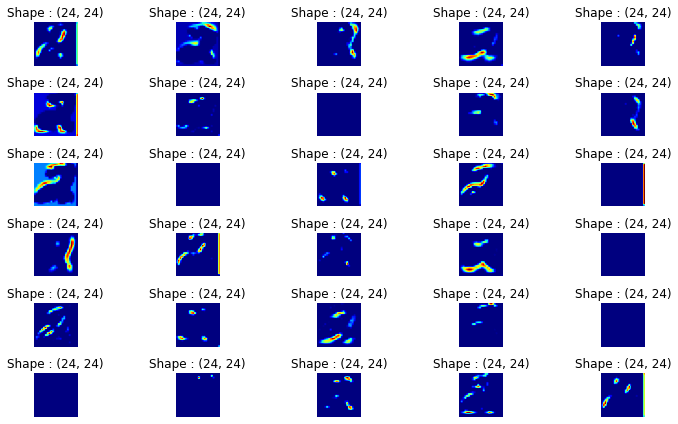

In [139]:
plt.figure(figsize = (10,6))
for i in range(30):
    select = visual_layer1[0,:,:,i]
    plt.subplot(6,5,i+1)
    plt.imshow(select,cmap = plt.get_cmap("jet"))
    plt.title(f"Shape : {select.shape}")
    plt.axis("off")

plt.tight_layout()
plt.show()

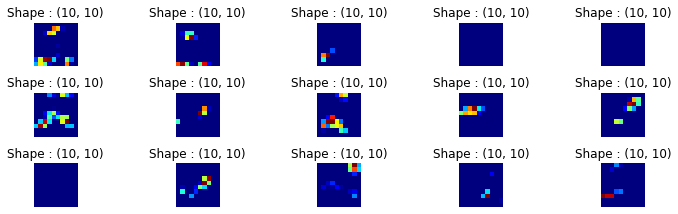

In [140]:
plt.figure(figsize = (10,6))
for i in range(15):
    select = visual_layer2[0,:,:,i]
    plt.subplot(6,5,i+1)
    plt.imshow(select,cmap = plt.get_cmap("jet"))
    plt.title(f"Shape : {select.shape}")
    plt.axis("off")

plt.tight_layout()
plt.show()